In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

In [3]:
train_df = pd.read_csv("./csv_files/train.csv")
weather_df = pd.read_csv("./csv_files/weather.csv")
key_df = pd.read_csv("./csv_files/key.csv")

In [4]:
train_df.head()

,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0
1,2012-01-01,1,2,0
2,2012-01-01,1,3,0
3,2012-01-01,1,4,0
4,2012-01-01,1,5,0


In [5]:
key_df.head()

,store_nbr,station_nbr
0,1,1
1,2,14
2,3,7
3,4,9
4,5,12


In [6]:
weather_df.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2012-01-01,52,31,42,M,36,40,23,0,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2,2012-01-01,48,33,41,16,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
2,3,2012-01-01,55,34,45,9,24,36,20,0,0735,1720,,0.0,0.00,29.77,30.47,9.9,31,10.0
3,4,2012-01-01,63,47,55,4,28,43,10,0,0728,1742,,0.0,0.00,29.79,30.48,8.0,35,8.2
4,6,2012-01-01,63,34,49,0,31,43,16,0,0727,1742,,0.0,0.00,29.95,30.47,14.0,36,13.8


In [7]:
train_key_merge_df = pd.merge(train_df,key_df,on='store_nbr',how='left')

In [8]:
train_weather_df = pd.merge(train_key_merge_df, weather_df, on = ['station_nbr','date'], how='inner')

In [9]:
train_weather_df.head()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2012-01-01,1,1,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2012-01-01,1,2,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
2,2012-01-01,1,3,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
3,2012-01-01,1,4,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
4,2012-01-01,1,5,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6


In [10]:
train_weather_df['grain'] = train_weather_df['store_nbr'].astype('str') + '_' + train_weather_df['item_nbr'].astype('str')

In [11]:
train_weather_df.replace('M','0',inplace=True)
train_weather_df.replace('  T','0',inplace=True)

In [12]:
def change_datatype():
    datetime_columns = ['date','sunrise','sunset']
    categorical_columns = ['station_nbr','codesum','grain','store_nbr','item_nbr']
    numerical_columns = [col for col in train_weather_df.columns if ((col not in categorical_columns) and (col not in datetime_columns))]
    datatypes = train_weather_df.dtypes.to_dict()
    for column in numerical_columns:
        datatypes[column] = 'float'
    for column in categorical_columns:
        datatypes[column] = 'object'
    dtp = OrderedDict()
    for (k, v) in datatypes.items():
        dtp[k] = str(v)

    print("Column datatypes : ",dtp)
    return dtp, numerical_columns

In [13]:
dtp,numerical_columns = change_datatype()
train_weather_df.astype(dtp)

Column datatypes :  OrderedDict([('date', 'object'), ('store_nbr', 'object'), ('item_nbr', 'object'), ('units', 'float'), ('station_nbr', 'object'), ('tmax', 'float'), ('tmin', 'float'), ('tavg', 'float'), ('depart', 'float'), ('dewpoint', 'float'), ('wetbulb', 'float'), ('heat', 'float'), ('cool', 'float'), ('sunrise', 'object'), ('sunset', 'object'), ('codesum', 'object'), ('snowfall', 'float'), ('preciptotal', 'float'), ('stnpressure', 'float'), ('sealevel', 'float'), ('resultspeed', 'float'), ('resultdir', 'float'), ('avgspeed', 'float'), ('grain', 'object')])


,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,grain
0,2012-01-01,1,1,0.0,1,52.0,31.0,42.0,0.0,36.0,...,-,RA FZFG BR,0.0,0.05,29.78,29.92,3.6,20.0,4.6,1_1
1,2012-01-01,1,2,0.0,1,52.0,31.0,42.0,0.0,36.0,...,-,RA FZFG BR,0.0,0.05,29.78,29.92,3.6,20.0,4.6,1_2
2,2012-01-01,1,3,0.0,1,52.0,31.0,42.0,0.0,36.0,...,-,RA FZFG BR,0.0,0.05,29.78,29.92,3.6,20.0,4.6,1_3
3,2012-01-01,1,4,0.0,1,52.0,31.0,42.0,0.0,36.0,...,-,RA FZFG BR,0.0,0.05,29.78,29.92,3.6,20.0,4.6,1_4
4,2012-01-01,1,5,0.0,1,52.0,31.0,42.0,0.0,36.0,...,-,RA FZFG BR,0.0,0.05,29.78,29.92,3.6,20.0,4.6,1_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617595,2014-10-31,39,107,0.0,8,78.0,55.0,67.0,0.0,0.0,...,-,RA,0.0,0.00,29.82,0.00,0.0,0.0,5.1,39_107
4617596,2014-10-31,39,108,0.0,8,78.0,55.0,67.0,0.0,0.0,...,-,RA,0.0,0.00,29.82,0.00,0.0,0.0,5.1,39_108
4617597,2014-10-31,39,109,0.0,8,78.0,55.0,67.0,0.0,0.0,...,-,RA,0.0,0.00,29.82,0.00,0.0,0.0,5.1,39_109
4617598,2014-10-31,39,110,0.0,8,78.0,55.0,67.0,0.0,0.0,...,-,RA,0.0,0.00,29.82,0.00,0.0,0.0,5.1,39_110


### Looking at the direct linear relationship between units and other weather parameters (including zeros)

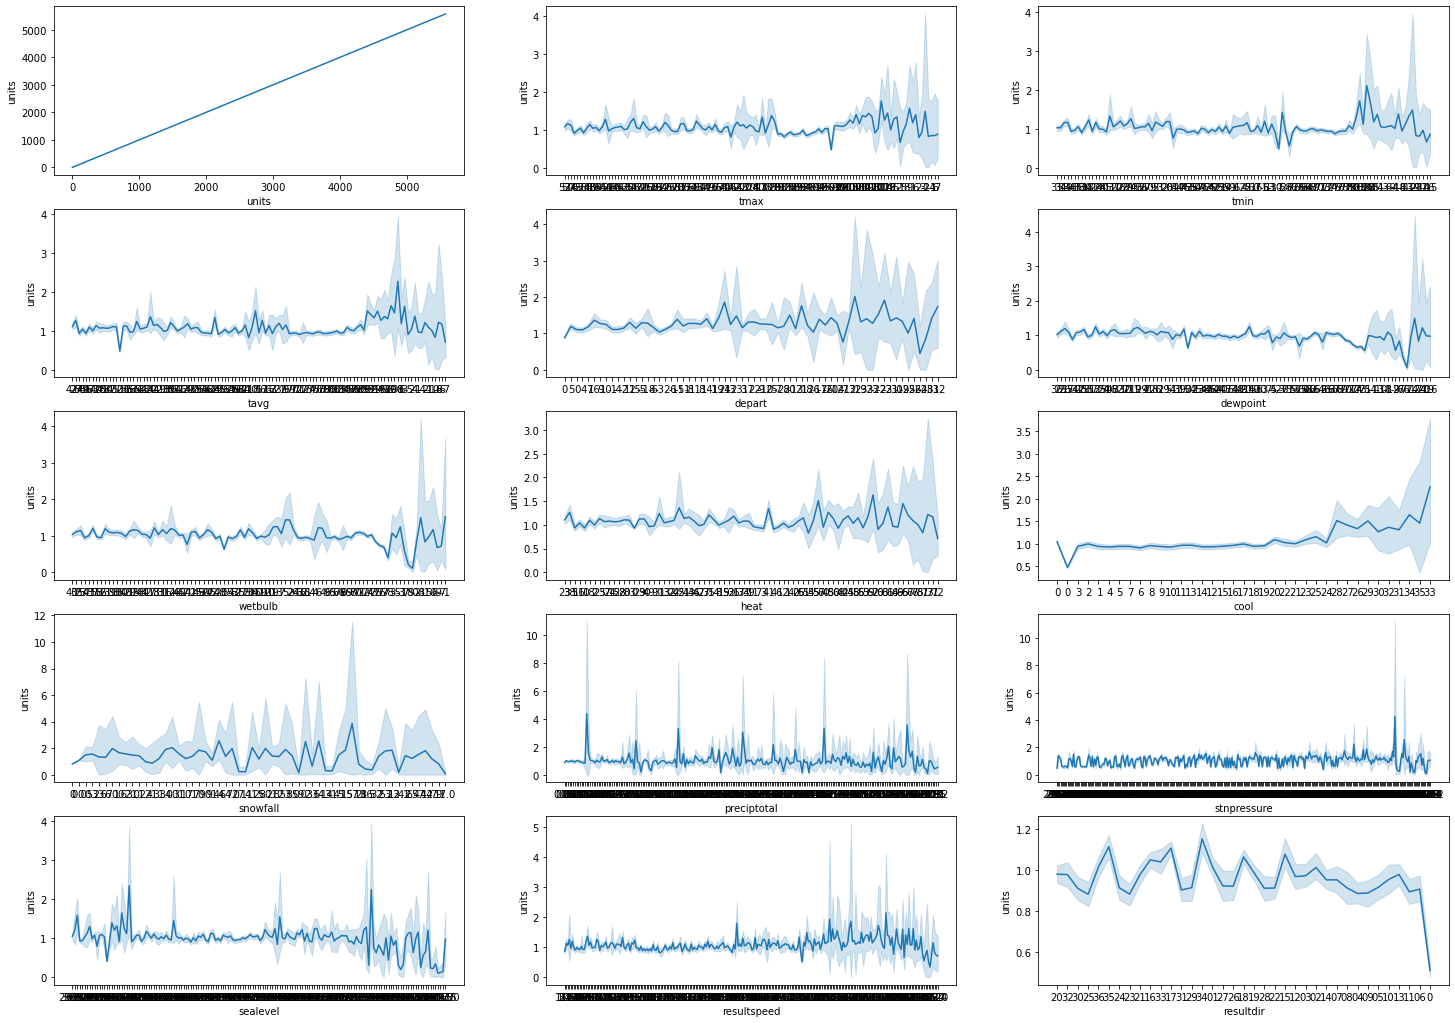

In [15]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(nrows = 5,ncols = 3,figsize=(25,18))
num_col_index = 0
for ax in fig.get_axes():
    sns.lineplot(x = numerical_columns[num_col_index],y='units',data=train_weather_df,ax=ax)
    num_col_index += 1

### Looking at the direct linear relationship between units and other weather parameters (excluding zeros)

In [16]:
temp_df = train_weather_df[train_weather_df['units'] != 0]

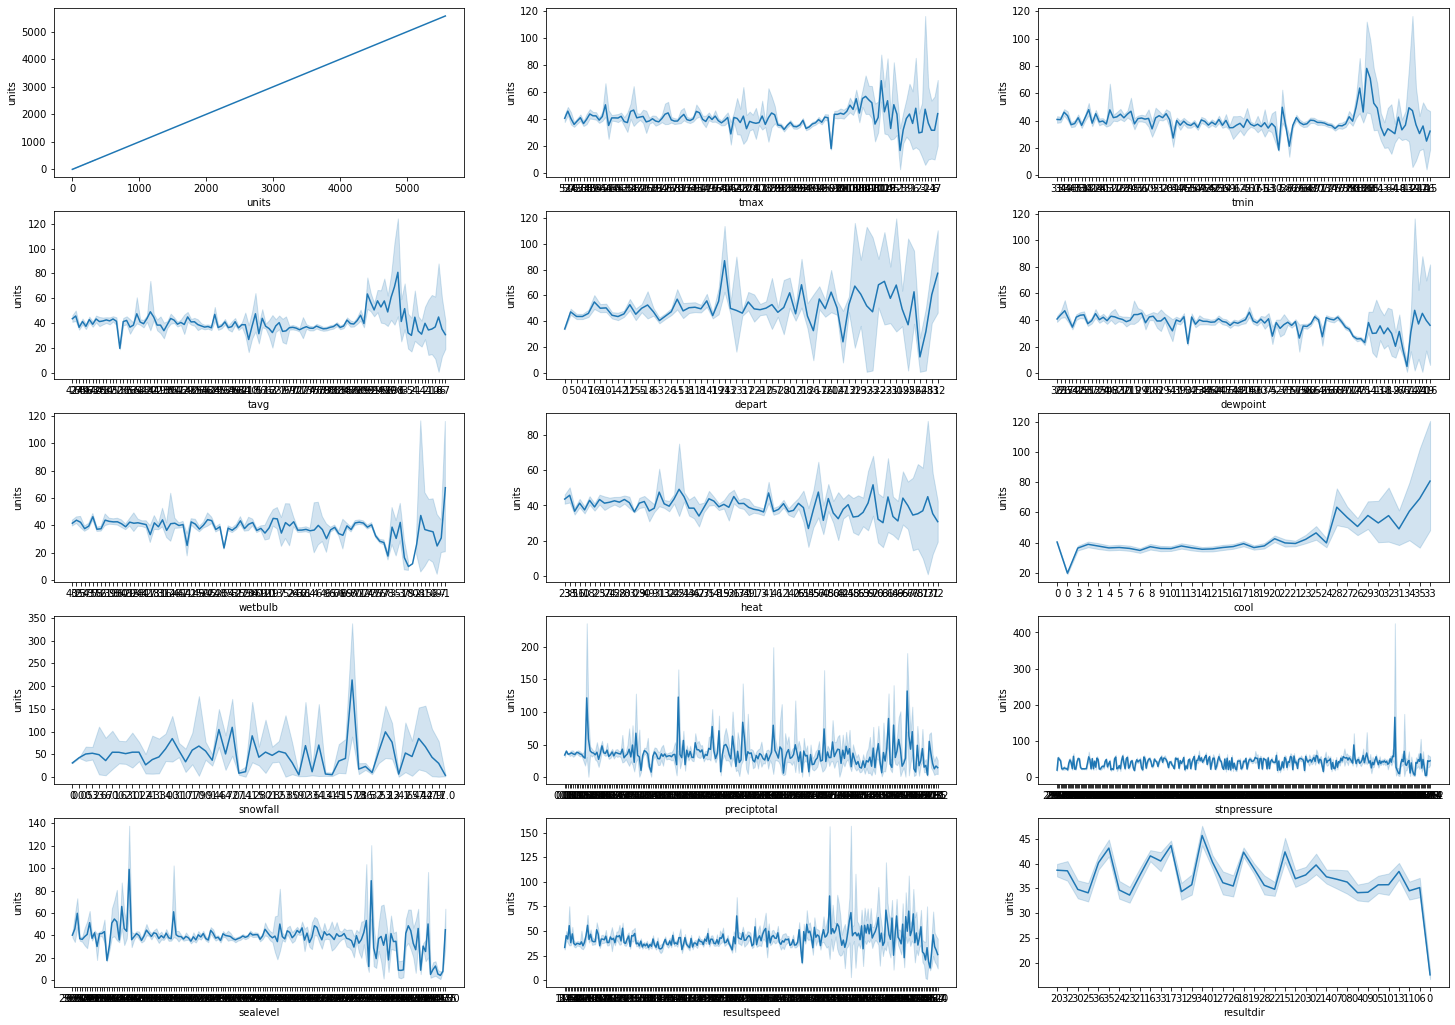

In [17]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(nrows = 5,ncols = 3,figsize=(25,18))
num_col_index = 0
for ax in fig.get_axes():
    sns.lineplot(x = numerical_columns[num_col_index],y='units',data=temp_df,ax=ax)
    num_col_index += 1

## Let's look at the correlation plot (including zeros)

In [18]:
train_weather_df = train_weather_df.astype(dtp)

<AxesSubplot:>

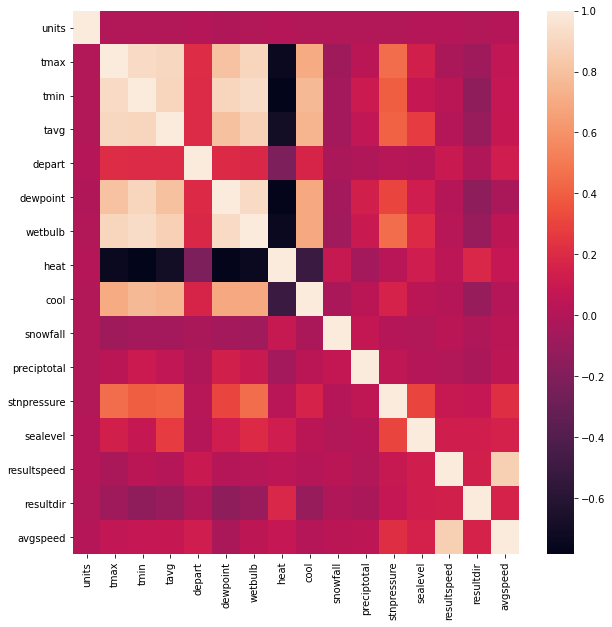

In [19]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize=(10,10))
sns.heatmap(train_weather_df.corr(),ax=ax)

### Summary : It can be seen that there is no high linear correlation between units and other weather columns

## Let's look at the correlation plot (excluding zeros)

In [20]:
temp_df = train_weather_df[train_weather_df['units'] != 0]

<AxesSubplot:>

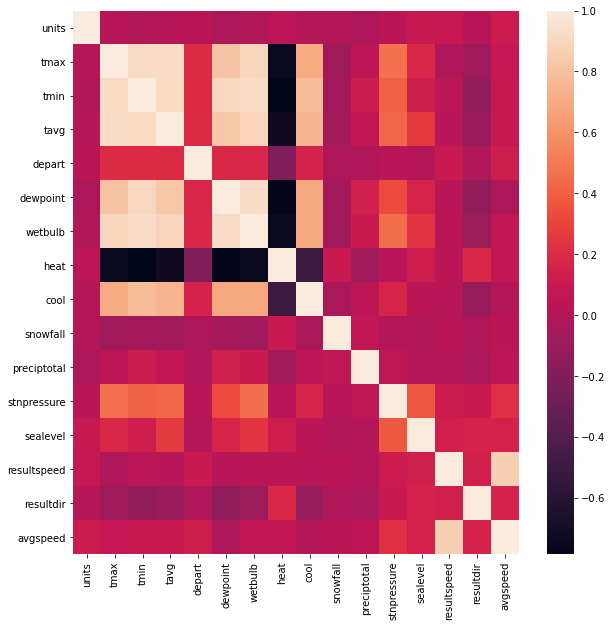

In [21]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize=(10,10))
sns.heatmap(temp_df.corr(),ax=ax)

<AxesSubplot:>

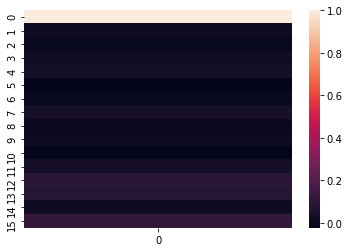

In [32]:
sns.heatmap(np.array(temp_df.corr().iloc[0]).reshape(16,1))

In [27]:
temp_df.corr().iloc[0]

units          1.000000
tmax           0.018333
tmin          -0.003041
tavg           0.021153
depart         0.031799
dewpoint      -0.023981
wetbulb       -0.000026
heat           0.040656
cool           0.007243
snowfall       0.010562
preciptotal   -0.020862
stnpressure    0.032822
sealevel       0.088817
resultspeed    0.081982
resultdir      0.019474
avgspeed       0.112955
Name: units, dtype: float64

### Summary : It can be seen that there is not much correlation between target and predictor variables

## Let's divide the weather conditions into different categories and see how it influences the units sold (Some sort of Feature Encoding)

In [48]:
train_weather_df['codesum'] = train_weather_df['codesum'].apply(lambda x : x.split(' '))

In [60]:
train_weather_df[train_weather_df['codesum'].apply(lambda x : 'FC' in x)]

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,grain


In [90]:
def split_string(weathers):
    weather_list = []
    for weather in weathers:
        weather_list.extend([weather[i:i+2] for i in range(0,len(weather),2)])
    return(weather_list)

In [91]:
train_weather_df['codesum_rev'] = train_weather_df['codesum'].apply(lambda x : split_string(x))

In [112]:
def check_weather_conditions(x,is_mild=True):
    if is_mild:
        mild_weather_cond = ['DZ','RA','SN','SG','BR','HZ']
        for weather_cond in mild_weather_cond:
            if weather_cond in x:
                return 1
            else:
                return 0 
    else:
        extreme_weather_cond = ['TS','FC','SS','DS','FG','VA','GR','FU','DU']
        for weather_cond in extreme_weather_cond:
            if weather_cond in x:
                return 1
            else:
                return 0

In [113]:
train_weather_df['extreme_weather'] = train_weather_df['codesum_rev'].apply(lambda x : check_weather_conditions(x,is_mild=False))
train_weather_df['mild_weather'] = train_weather_df['codesum_rev'].apply(lambda x : check_weather_conditions(x))

In [116]:
train_weather_df[train_weather_df['mild_weather']==1]

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,grain,codesum_rev,extreme_weather,mild_weather
40626,2012-01-09,7,1,0.0,6,58.0,43.0,51.0,2.0,48.0,...,0.62,29.48,30.00,11.2,35.0,12.5,7_1,"[TS, RA, RA, DZ, BR]",1,1
40627,2012-01-09,7,2,0.0,6,58.0,43.0,51.0,2.0,48.0,...,0.62,29.48,30.00,11.2,35.0,12.5,7_2,"[TS, RA, RA, DZ, BR]",1,1
40628,2012-01-09,7,3,0.0,6,58.0,43.0,51.0,2.0,48.0,...,0.62,29.48,30.00,11.2,35.0,12.5,7_3,"[TS, RA, RA, DZ, BR]",1,1
40629,2012-01-09,7,4,0.0,6,58.0,43.0,51.0,2.0,48.0,...,0.62,29.48,30.00,11.2,35.0,12.5,7_4,"[TS, RA, RA, DZ, BR]",1,1
40630,2012-01-09,7,5,133.0,6,58.0,43.0,51.0,2.0,48.0,...,0.62,29.48,30.00,11.2,35.0,12.5,7_5,"[TS, RA, RA, DZ, BR]",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530238,2014-10-11,42,107,0.0,14,59.0,50.0,55.0,-9.0,48.0,...,0.14,28.68,30.06,9.4,1.0,9.9,42_107,"[RA, DZ, BR]",0,1
4530239,2014-10-11,42,108,0.0,14,59.0,50.0,55.0,-9.0,48.0,...,0.14,28.68,30.06,9.4,1.0,9.9,42_108,"[RA, DZ, BR]",0,1
4530240,2014-10-11,42,109,0.0,14,59.0,50.0,55.0,-9.0,48.0,...,0.14,28.68,30.06,9.4,1.0,9.9,42_109,"[RA, DZ, BR]",0,1
4530241,2014-10-11,42,110,0.0,14,59.0,50.0,55.0,-9.0,48.0,...,0.14,28.68,30.06,9.4,1.0,9.9,42_110,"[RA, DZ, BR]",0,1


## Creating a boxplot to see the relation between extreme and mild weather conditions and units of items sold
* ### Exempting 0 units and the visible outliers from the boxplot

<AxesSubplot:xlabel='extreme_weather', ylabel='units'>

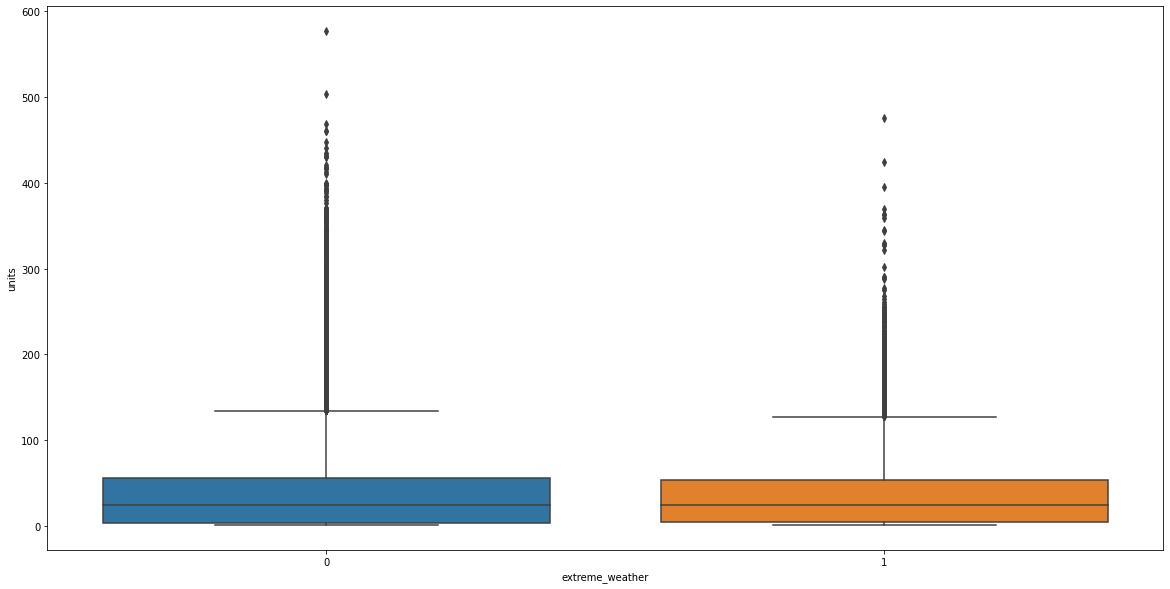

In [125]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize=(20,10))
sns.boxplot(x='extreme_weather',y='units',data = train_weather_df[(train_weather_df['units']!=0) & (train_weather_df['units']<1000)],ax=ax)

<AxesSubplot:xlabel='mild_weather', ylabel='units'>

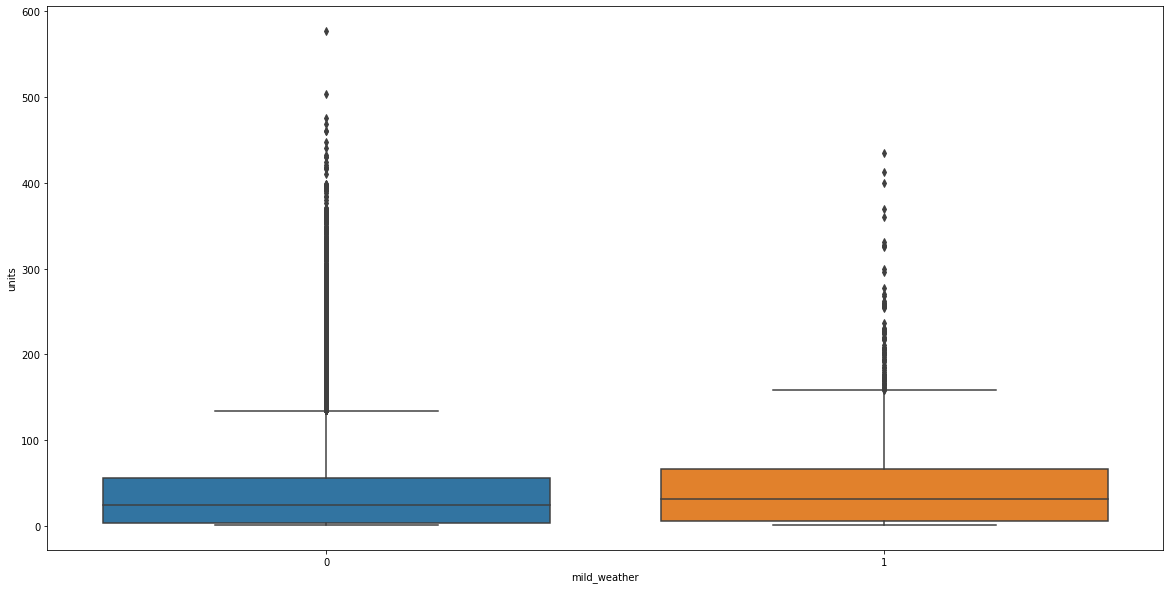

In [127]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize=(20,10))
sns.boxplot(x='mild_weather',y='units',data = train_weather_df[(train_weather_df['units']!=0) & (train_weather_df['units']<1000)],ax=ax)

#### Summary : No direct relation found between weather conditions and units of sales

## Plotting units sold for each store

<AxesSubplot:xlabel='store_nbr', ylabel='units'>

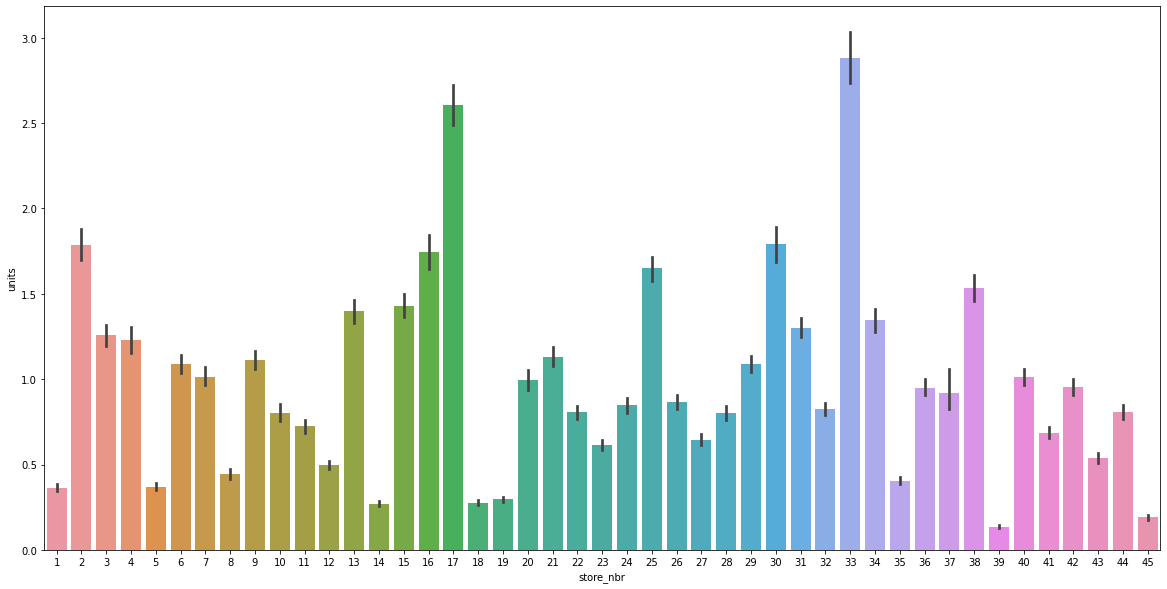

In [134]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize=(20,10))
sns.barplot(x = 'store_nbr',y = 'units', data=train_weather_df,ax = ax)

### Summary
* #### Different number of units sold in each of the stores
* #### This can turn out to be a useful feature

## Units sold for each store in extreme weather condition

<AxesSubplot:xlabel='store_nbr', ylabel='units'>

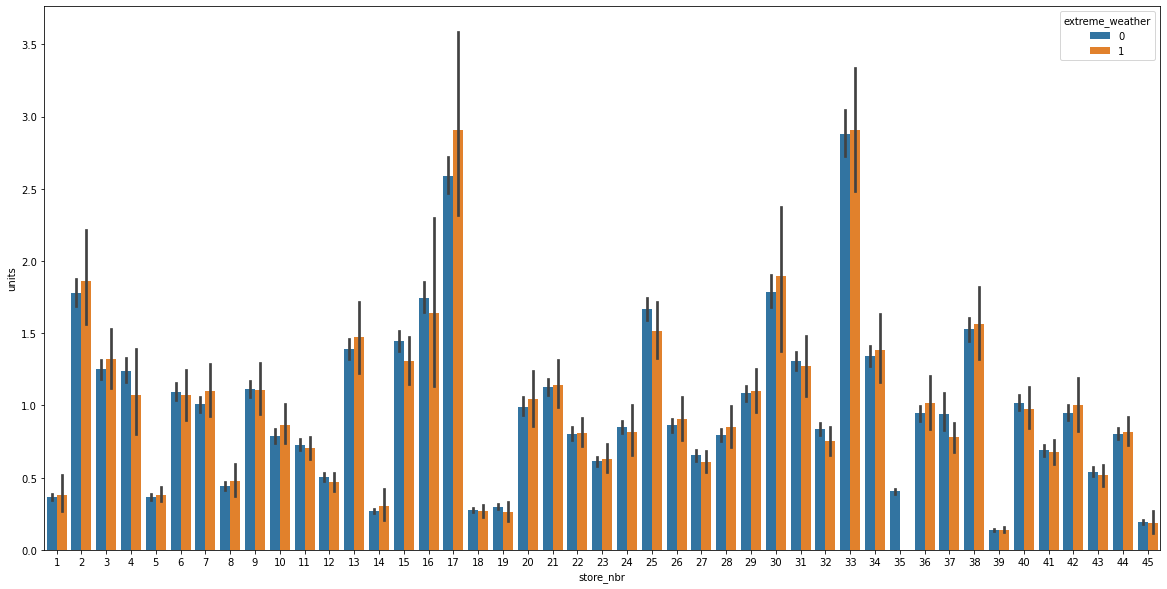

In [129]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize=(20,10))
sns.barplot(x = 'store_nbr',y = 'units', hue = 'extreme_weather', data=train_weather_df,ax = ax)

### Summary  
* #### There are a few differences in the units sold in extreme weather conditions for a given store.
* #### But those are not major differences.

## Units sold for each item

<AxesSubplot:xlabel='item_nbr', ylabel='units'>

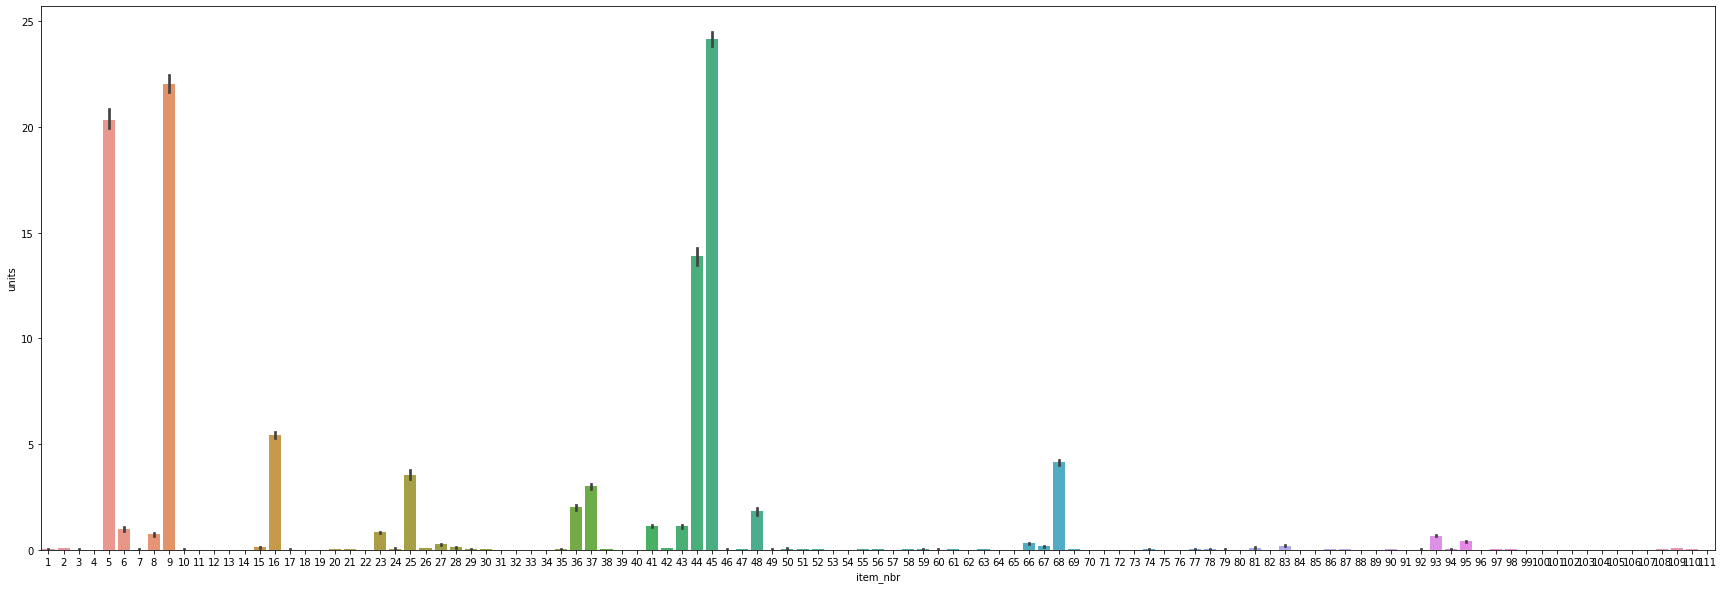

In [132]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize=(30,10))
sns.barplot(x = 'item_nbr',y = 'units', data=train_weather_df,ax = ax)

### Summary
* #### Different number of units sold for each item.
* #### This can turn out to be a useful feature too.

## Plotting units sold for each item in extreme weather conditions

<AxesSubplot:xlabel='item_nbr', ylabel='units'>

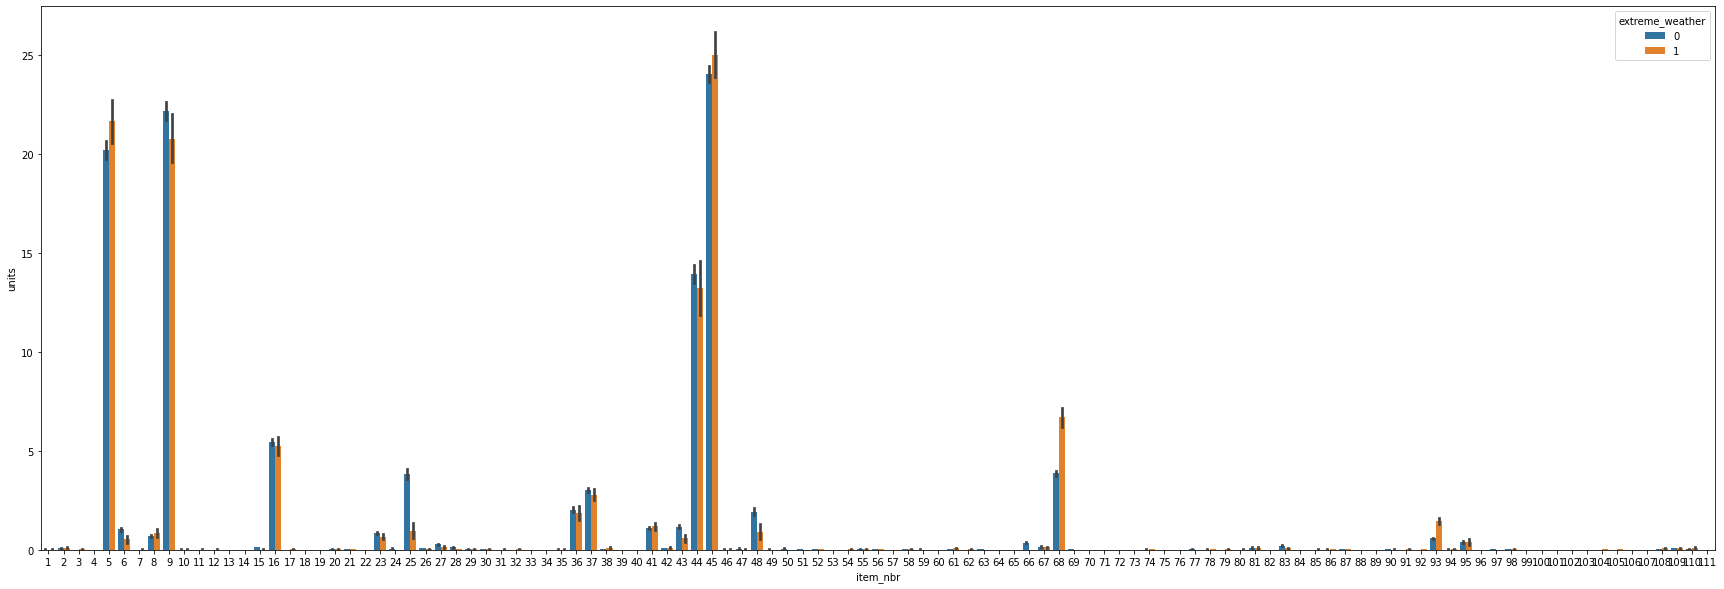

In [130]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize=(30,10))
sns.barplot(x = 'item_nbr',y = 'units', hue = 'extreme_weather', data=train_weather_df,ax = ax)

In [145]:
q95,q100 = np.percentile(train_weather_df.groupby(['grain'])['units'].sum(),q=[95,100])

In [153]:
## Forming a dataframe of sum of units grouped by grain
sum_df = train_weather_df.groupby(['grain'])['units'].sum().reset_index()

Selecting only the top 5%ile grains

In [161]:
sum_df[sum_df['units'] >= q95]['grain'].nunique()

250

* Won't be able to plot all 250 rows
* So finding the threshold to plot

<AxesSubplot:xlabel='units', ylabel='Density'>

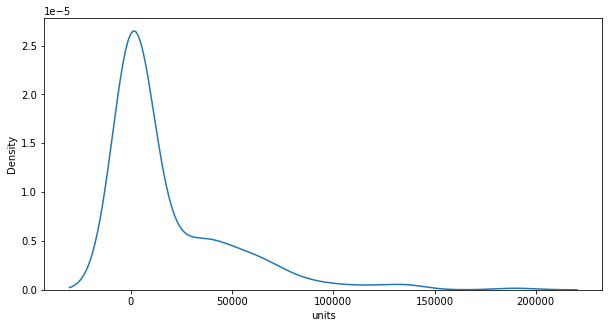

In [159]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize=(10,5))
sns.kdeplot(sum_df[sum_df['units']>=q95]['units'])

In [166]:
constraint_df = sum_df[(sum_df['units'] >= q95) & (sum_df['units'] <= 5000)]

<AxesSubplot:xlabel='grain', ylabel='units'>

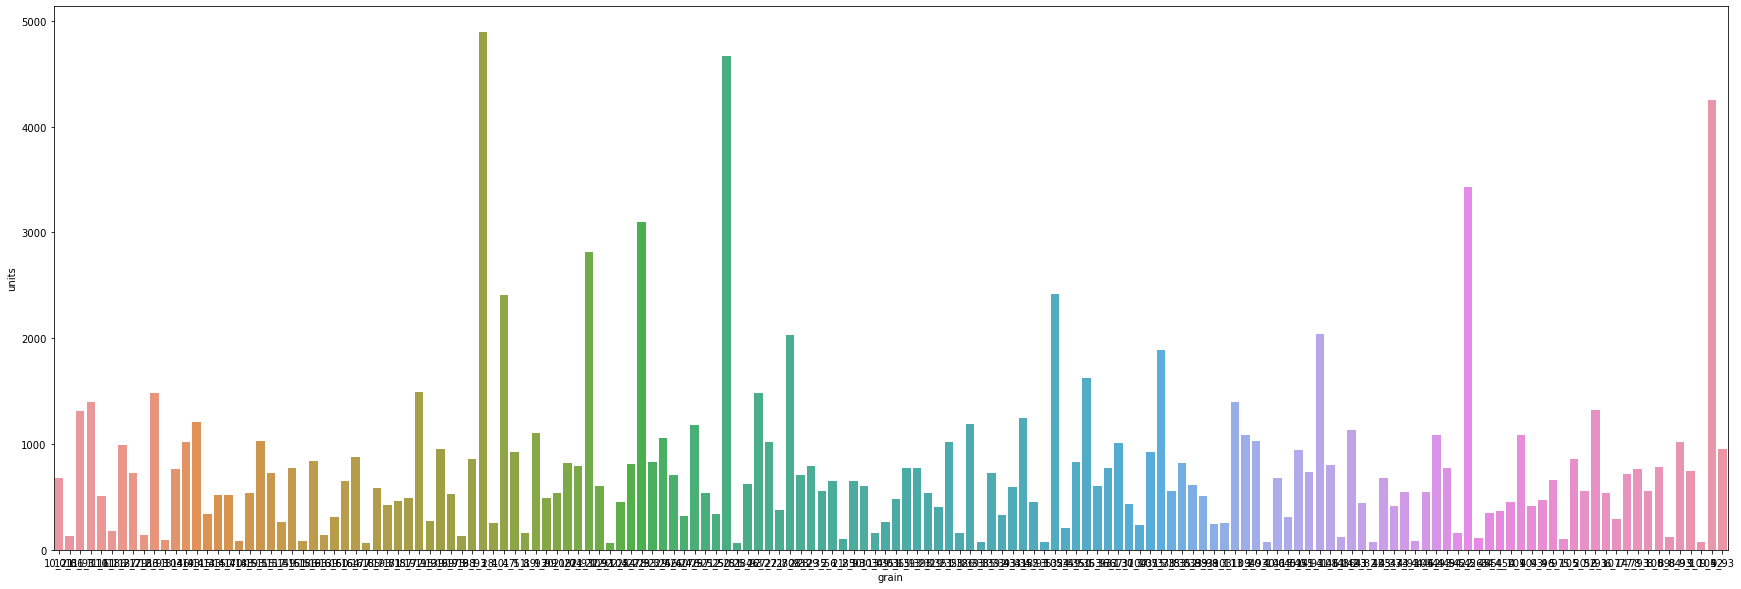

In [167]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize=(30,10))
sns.barplot(x = 'grain',y = 'units', data=constraint_df,ax = ax)

### Summary 
* Looking at the diversification of the plot, this will turn out to be a good feature.